In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import pickle

# Aufgabe 1: Filtern mit Faltungsmatrizen

In der Vorlesung haben sie Convolutional Neural Networks kennengelernt, in denen durch Filtern und Pooling Information aus einem Bild extrahiert wird, die dann von einem herkömmlichen neuronalen Netzwerk weiterverarbeitet wird. In dieser Übung implementieren Sie die Schritte des ersten Teils (Filtern und Pooling) selbst und wenden Sie auf einfache Beispiele an, um sich deren Funktionsweise zu veranschaulichen.

## a)

Laden Sie das Bild 'Data1/shapes.png', das einige einfache Formen in schwarz-weiss darstellt. Sie können dazu die Funktion `skimage.io.imread` mit dem Argument `as_gray=True` verwenden, welche Ihnen das Bild as 2D-Numpy-Array zurückgibt. Plotten Sie das Bild mit `plt.imshow`.

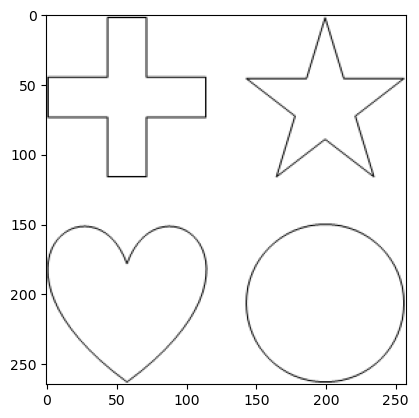

In [3]:
shapes=skimage.io.imread("Data1/shapes.png")
plt.imshow(shapes)

## b)

Schreiben Sie nun eine Funktion, die das Filtern mit einer Faltungsmatrix implementiert. Als Argumente nimmt die Funktion zwei 2D-Arrays: Das Bild, das gefiltert wird, und die Faltungsmatrix.

Testen Sie die Funktion mit den folgenden kleinen Matrizen:

In [4]:
def convolve2D(image, kernel):
    # Cross Correlation
    #kernel = np.flipud(np.fliplr(kernel))
    # Gather Shapes of Kernel + Image + Padding
    xK = kernel.shape[0]
    yK = kernel.shape[1]
    xImg = image.shape[0]
    yImg = image.shape[1]

    padding = xK/2

    # Shape of Output Convolution
    xOutput = int(((xImg - xK + 2 * padding) ) + 1)
    yOutput = int(((yImg - yK + 2 * padding) ) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yK:
            break
        # Only Convolve if y has gone down by the specified Strides
        for x in range(image.shape[0]):
            # Go to next row once kernel is out of bounds
            if x > image.shape[0] - xK:
                break
            try:
                # Only Convolve if x has moved by the specified Strides
                output[x, y] = (kernel * imagePadded[x: x + xK, y: y + yK]).sum()
            except:
                break

    return output


testimage = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [9, 10, 11]
])
testfilter = np.array([
    [1, 1],
    [-1, 1]
])

testoutput = np.array([
    [4, 6],
    [10, 12]
])

## c)

Verwenden Sie nun Ihre Funktion, um das Bild 'shapes.png' mit jeder der folgenden vier Filtermatrizen zu filtern. Überlegen Sie sich, welcher Operation diese Filter entsprechen. Plotten Sie die gefilterten Bilder und schauen Sie, welche Features von welchem Filter hervorgehoben werden.

In [ ]:
filter_vertical = np.array([[-1, 1], [-1, 1]])
filter_horizontal = np.array([[-1, -1], [1, 1]])
filter_diagonal = np.array([[-1, 0], [0, 1]])
filter_antidiagonal = np.array([[0, 1], [-1, 0]])

## d)

Wiederholen Sie Aufgabe c) mit den folgenden Filtern, die den Filtern aus dem Beispiel für Convolutional Neural Networks in der Vorlesung entsprechen. Sie sollten erneut sehen, dass gewisse Features hervorgehoben werden.

In [ ]:
filtersize = 5
filter_vertical = np.zeros(shape=(filtersize, filtersize))
filter_vertical[:, (filtersize+1)//2:] = 1
filter_horizontal = filter_vertical.T
filter_diagonal = np.identity(filtersize)
filter_antidiagonal = np.rot90(filter_diagonal)

## e)

Schreiben Sie nun eine Funktion, die ein $(2\times2)$ Pooling implementiert. Die Funktion soll als Argument nur das Bild nehmen, auf das das Pooling angewendet wird. Testen Sie die Funktion mit der folgenden Matrix.

In [ ]:
testmatrix = np.array([
    [0., 1., 2., 3., 4.],
    [1., 2., 3., 4., 5.],
    [2., 3., 4., 5., 6.],
    [3., 4., 5., 6., 7.],
    [4., 5., 6., 7., 8.]
])

testoutput = np.array([
    [2., 4.],
    [4., 6.]
])

## f)

Schreiben Sie eine Funktion, die das Vorgehen eines Convolutional Neural Networks imitiert: Filter und Pooling werden iterativ angewendet, bis das Bild kleiner als die Filtermatrix ist. Dann wird das Maximum aller übrig geblibebenen Einträge zurückgegeben. Die Funktion nimmt wieder zwei Argumente, das Input-Bild und die Filtermatrix.

Testen Sie die Funktion mit den folgenden Matrizen.

In [ ]:
testmatrix = np.array([
    [0., 1., 2., 3., 4.],
    [1., 2., 3., 4., 5.],
    [2., 3., 4., 5., 6.],
    [3., 4., 5., 6., 7.],
    [4., 5., 6., 7., 8.]
])

testfilter = np.array([
    [1, 1],
    [0, 0]
])

testoutput = 13

## g)

Laden Sie die Dateien 'Data1/input_1.p', 'Data1/input_2.p', 'Data1/input_3.p' und 'Data1/input_4.p' mit `pickle`. Die Dateien enthalten 2D-Arrays mit schwarz-weiss Bildern im gleichen Format wie oben. **Plotten Sie die Bilder noch nicht!**

Wenden Sie nacheinander auf jedes Bild das iterative Filtern und Pooling mit jedem der unten gegebenen Filtern an.
Sie sollten aufgrund der ausgegebenen Zahlen in der Lage sein, Vermutungen über den Inhalte der Bilder anzustellen.
Plotten Sie danach die Bilder und überprüfen Sie Ihre Vermutungen.

In [ ]:
filtersize = 5
filter_vertical = np.zeros(shape=(filtersize, filtersize))
filter_vertical[:, (filtersize+1)//2:] = 1
filter_horizontal = filter_vertical.T
filter_diagonal = np.identity(filtersize)
filter_antidiagonal = np.rot90(filter_diagonal)

# Bonusaufgabe: k-means Clustering in 2D

Diese Aufgabe ist eine freiwillige Bonusaufgabe. Sie können sich hier der Herausforderung stellen, einen k-means Clustering Algorithmus selber zu implementieren. Der Algorithmus teilt eine Punktewolke in $\mathbb{R}^2$ in $k$ Clusters auf.

Wir geben Ihnen zuerst eine Beschreibung des gesamten Algorithmus. Anschliessend implementieren und testen Sie die Schritte einzeln, bevor Sie sie zum Algorithmus zusammenfügen und diesen auf einem Testdatensatz anwenden.

**Clustering Algorithmus**

Inputs: Koordinaten $(x_i, y_i)$ aller Punkte, Anzahl $k$ Clusters.

Am Anfang werden $k$ Punkte zufällig gewählt. Diese dienen als Ausgangswerte für die Schwerpunkte der Clusters.

Nun werden folgende zwei Schritte iterativ ausgeführt:

1. Weise jeden Punkt dem Cluster zu, dessen Schwerpunkt (Centroid) am nächsten liegt.

2. Berechne die Schwerpunkte der Clusters neu (Mittelwert der Koordinaten in jedem Cluster.

Die Iteration wird solange durchgeführt, bis sich die Position der Schwerpunkte nicht mehr ändert.

## a)

Schreiben Sie eine Funktion, die die euklidische Distanz zwischen zwei Punkten berechnet.

## b)

Implementieren Sie den ersten Schritt der Iteration: Die Zuweisung der Punkte zu Clusters mit gegebenen Schwerpunkten. Sie können das als Funktion schreiben, oder einfach als Codesnippet, das sie nach dem Testen in den Algorithmus kopieren.

Verwenden Sie hier die vordefinierten Arrays `points` und `centroids`, welche die Datenpunkte und die Schwerpunkte der Clusters enthalten. Iterieren Sie durch alle Datenpunkte, finden Sie den nächstgelegenen Schwerpunkt, und speichern Sie den Index dieses Schwerpunktes in einem Array `assignment`.

*Hinweis: Da im Array `assignment` Indizes gespeichert werden, ist es vorteilhaft, den Datentyp der Arrayeinträge als `int` festzulegen (`dtype=int`).*

Zum Überprüfen können sie die Punkte als Scatterplot darstellen, wobei die Farbe jedes Punktes der Zuweisung zum Cluster entspricht.

In [ ]:
n_clusters = 2
points = pickle.load(open('Data2/testpoints.p', 'rb'))
centroids = pickle.load(open('Data2/testcentroids.p', 'rb'))

## c)

Implementieren Sie den zweiten Schritt der Iteration: Die Neuberechnung der Schwerpunkte.
    
Verwenden Sie die vordefinierten Array `points` und `assignment`. Die Anzahl Cluster ist auch bekannt und in der Variable `n_clusters` gespeichert. Ermitteln Sie den Mittelwert der Koordinaten aller Punkten, die zum gleichen Cluster gehören, wobei x- und y-Koordinaten  separat gemittelt werden. Speichern Sie diese Mittelwerte in `new_centroids`. Sie entsprechen den Koordinaten  der neuen Schwerpunkte.

Zum Überprüfen können Sie wieder die Punkte als Scatterplot darstellen und zusätzlich die Schwerpunkte rot markiert plotten.

<br>
<details>
    <summary><u>Tipp 1 anzeigen</u></summary>
    <br>
    Initialisieren Sie ein Array <code>coord_sum</code> der Grösse <code>(n_clusters, 2)</code>, um die Summe der Koordinaten der Punkte in jedem Cluster zu speichern, und ein Array <code>cluster_size</code> der Grösse <code>(n_clusters)</code>, um die Anzahl Punkte in jedem Cluster zu speichern.
    Iterieren Sie durch die Punkte, um die Koordinaten aufzusummieren und die Grösse der Clusters zu bestimmen.
</details>

<br>
<details>
    <summary><u>Tipp 2 anzeigen</u></summary>
    <br>
    <b>Methode 1</b>: Ein äusserer for-Loop mit Laufvariable <code>k</code> iteriert durch alle Clusters. Ein innerer for-Loop iteriert durch alle Punkte. Bei jedem Punkt prüfen Sie, ob er im <code>k</code>-ten Cluster ist und falls ja addieren Sie seine Koordinaten zu <code>coord_sum[k]</code> und erhöhen <code>n_clusters[k]</code> um 1. <br>
    <b>Methode 2</b>: Nur ein for-Loop, der durch alle Punkte iteriert, Laufvariable <code>i</code>. Lesen Sie den Index <code>k</code> des Clusters, in dem der <code>i</code>-te Punkt liegt, aus dem Array <code>assignment</code>. Addieren Sie die Koordinaten des <code>i</code>-ten Punktes zu <code>coord_sum[k]</code> und erhöhen Sie <code>n_clusters[k]</code> um 1. <br><br>
    Bilden Sie aus <code>coord_sum</code> und <code>cluster_size</code> den Mittelwert der Koordinaten jedes Clusters und speichern Sie diese im Array <code>new_centroids</code>.
</details>

In [ ]:
n_clusters = 2
points = pickle.load(open('Data2/testpoints.p', 'rb'))
assignment = pickle.load(open('Data2/testassignment.p', 'rb'))

## d)

Setzen Sie nun die zwei Schritte zum iterativen Algorithmus zusammen. Schreiben Sie hierzu eine Funktion, die folgende Argumente nimmt:

- points: Das Array mit den Datenpunkten.
- n_clusters: Ein Integer mit der Anzahl Clusters, in die die Punkte eingeteilt werden sollen.
- tol: Eine absolute Toleranz für die Abbruchbedingung (siehe unten).
- max_iterations: Ein Integer, das angibt, nach wie vielen Durchgängen die Iteration spätestens abgebrochen wird.

Für die Initialisierung erstellen sie ein Zufallsgenerator-Objekt mit `rng = np.random.default_rng()` und verwenden dessen Funktion `rng.choice()` um zufällige Punkte aus dem Datensatz zu wählen.

Die zwei Schritten kommen dann in eine `while`-Schleife mit folgenden Abbruchbedingungen:

- Kein Schwerpunkt hat sich im letzten Durchlauf um mehr als `tol` verschoben, **oder**
- Die Anzahl Durchläufe ist grösser als `max_iterations`.

Am Ende gibt die Funktion die Arrays `assignment` und `centroids` aus, die die Zuweisung der Punkte zu Clusters und die Schwerpunkte der Clusters enthalten.

Testen Sie Ihren Code am Datensatz 'Data2/xy_dataset.txt'. Sie können mit `sklearn.datasets.make_blobs(centers=n_clusters)` auch eigene Datensätze mit mehr oder weniger Clusters generieren. Wenn Sie die Zwischenresultate des Algorithmus anschauen wollen, können Sie `max_iterations` auf 1, 2, 3, etc. setzen und das Resultat plotten.

Extrabonus: Verallgemeinern Sie den Algorithmus für Punkte in $\mathbb{R}^n$.

In [ ]:
from sklearn.datasets import make_blobs